In [162]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# Project
## Lung Cancer ML 

In [163]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\lung_cancer_dataset.csv")

# Data Info

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 50000 non-null  int64  
 1   age                        50000 non-null  int64  
 2   gender                     50000 non-null  object 
 3   pack_years                 50000 non-null  float64
 4   radon_exposure             50000 non-null  object 
 5   asbestos_exposure          50000 non-null  object 
 6   secondhand_smoke_exposure  50000 non-null  object 
 7   copd_diagnosis             50000 non-null  object 
 8   alcohol_consumption        33338 non-null  object 
 9   family_history             50000 non-null  object 
 10  lung_cancer                50000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.2+ MB


In [165]:
df.shape

(50000, 11)

In [166]:
df.head()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


# Data Cleaning & Handling

In [167]:
df["alcohol_consumption"]=df["alcohol_consumption"].fillna(df["alcohol_consumption"].mode()[0])

In [168]:
df.duplicated().sum()

np.int64(0)

In [169]:
df.isna().sum()

patient_id                   0
age                          0
gender                       0
pack_years                   0
radon_exposure               0
asbestos_exposure            0
secondhand_smoke_exposure    0
copd_diagnosis               0
alcohol_consumption          0
family_history               0
lung_cancer                  0
dtype: int64

In [170]:
df.drop(columns=["patient_id"],inplace=True)

In [171]:
df.head()

,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,89,Female,0.408278,Medium,Yes,Yes,Yes,Heavy,No,Yes
3,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,38,Female,44.432440,Medium,Yes,No,Yes,Heavy,Yes,Yes


# EDA & Visualization

In [172]:
df.head()

,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,89,Female,0.408278,Medium,Yes,Yes,Yes,Heavy,No,Yes
3,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,38,Female,44.432440,Medium,Yes,No,Yes,Heavy,Yes,Yes


In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [174]:
df.columns

Index(['age', 'gender', 'pack_years', 'radon_exposure', 'asbestos_exposure',
       'secondhand_smoke_exposure', 'copd_diagnosis', 'alcohol_consumption',
       'family_history', 'lung_cancer'],
      dtype='object')

In [175]:
le=LabelEncoder()

In [176]:
from sklearn.preprocessing import LabelEncoder

to_encode = df[["gender",'pack_years', 'radon_exposure', 'asbestos_exposure', 
                'secondhand_smoke_exposure', 'copd_diagnosis', 
                'alcohol_consumption', 'family_history', 'lung_cancer']].copy()

le = LabelEncoder()
for col in to_encode.columns:
    to_encode[col] = le.fit_transform(to_encode[col])

df[to_encode.columns] = to_encode


In [177]:
df.head()

,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,69,1,32970,0,0,0,1,1,0,0
1,32,0,6402,0,0,1,1,1,1,1
2,89,0,220,2,1,1,1,0,0,1
3,78,0,21931,1,0,1,0,1,0,1
4,38,0,22116,2,1,0,1,0,1,1


In [178]:
df.drop(columns=["gender","radon_exposure"],inplace=True)

In [179]:
df.columns

Index(['age', 'pack_years', 'asbestos_exposure', 'secondhand_smoke_exposure',
       'copd_diagnosis', 'alcohol_consumption', 'family_history',
       'lung_cancer'],
      dtype='object')

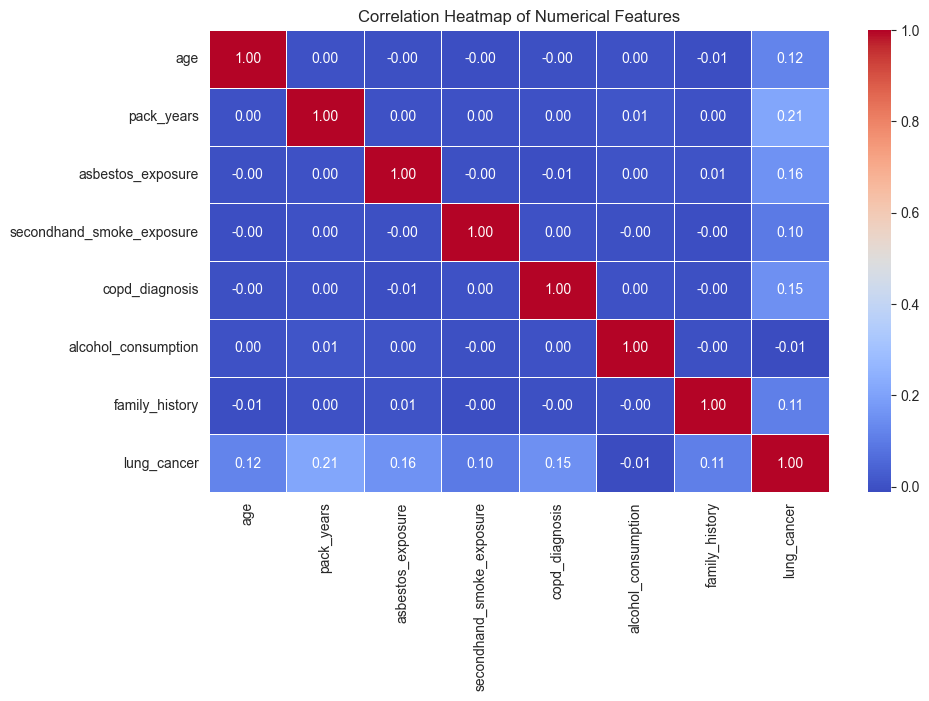

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# Machine Learning

In [181]:
df.head()

,age,pack_years,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,69,32970,0,0,1,1,0,0
1,32,6402,0,1,1,1,1,1
2,89,220,1,1,1,0,0,1
3,78,21931,0,1,0,1,0,1
4,38,22116,1,0,1,0,1,1


In [182]:
df.columns

Index(['age', 'pack_years', 'asbestos_exposure', 'secondhand_smoke_exposure',
       'copd_diagnosis', 'alcohol_consumption', 'family_history',
       'lung_cancer'],
      dtype='object')

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X = df.drop(columns=["lung_cancer"])
y = df["lung_cancer"]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
model=LogisticRegression(max_iter=1000)
Std=StandardScaler()
X_train=Std.fit_transform(X_train)
X_test=Std.transform(X_test)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)


Accuracy: 0.7186
Precision: 0.7429526994744386
Recall: 0.9038070328392909
F1 Score: 0.8155237970368427

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.31      0.41      3118
           1       0.74      0.90      0.82      6882

    accuracy                           0.72     10000
   macro avg       0.67      0.61      0.61     10000
weighted avg       0.70      0.72      0.69     10000



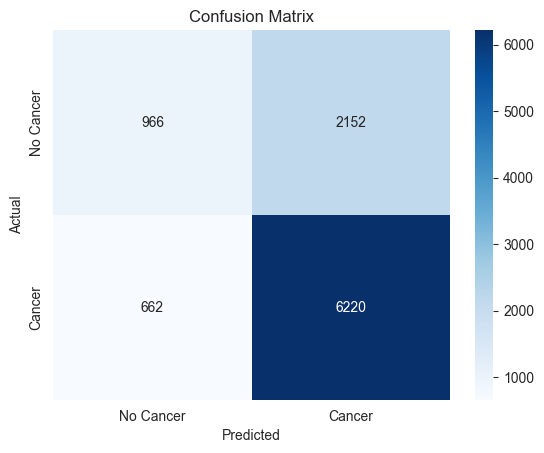

In [186]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# 6. Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer','Cancer'], yticklabels=['No Cancer','Cancer'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
